In [12]:
from preprocess import DataLoader, DataPreprocessor, DataSplitter


In [13]:
import pandas as pd

# Load data
filepath = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
data_loader = DataLoader(filepath)
df = data_loader.load_data()

# Check data quality
df = data_loader.check_data_quality()
print("Data Quality Check Complete")
display(df.head())  # Visualize in Notebook



Null values in columns:
TotalCharges    11
dtype: int64

Total duplicate rows: 22
Data Quality Check Complete


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Correlation with 'Churn':
Churn             1.000000
MonthlyCharges    0.194008
TotalCharges     -0.198362
tenure           -0.353339
Name: Churn, dtype: float64


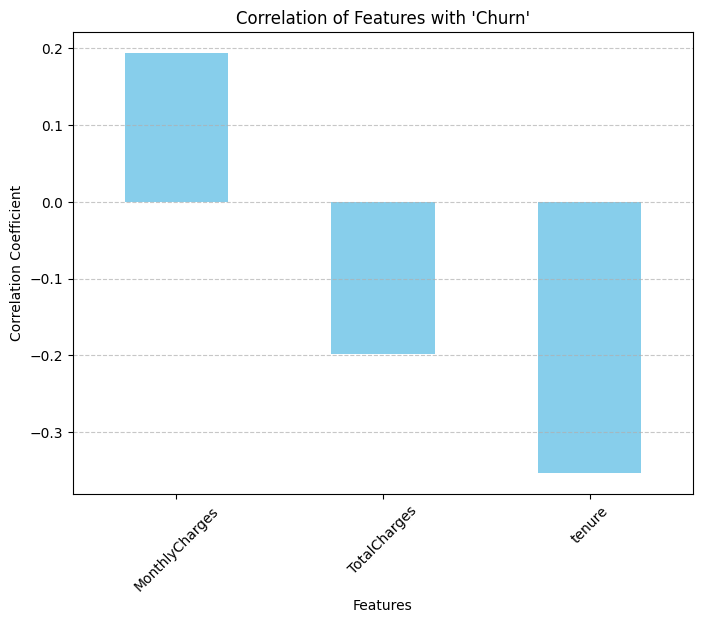

In [14]:
import seaborn as sns

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Ensure 'Churn' is numeric
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Handle missing values by dropping them
df = df.dropna()

# Ensure there is variance in numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations between numeric features and 'Churn'
correlations = numeric_df.corr()['Churn'].sort_values(ascending=False)

# Display correlations
print("Correlation with 'Churn':")
print(correlations)

# Plot a bar chart for correlation with 'Churn'
plt.figure(figsize=(8, 6))
correlations.drop('Churn').plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with 'Churn'")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Numeric Columns: Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')
Categorical Columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
InternetService  Churn
DSL              0        0.810688
                 1        0.189312
Fiber optic      0        0.582201
                 1        0.417799
No               0        0.927623
                 1        0.072377
Name: proportion, dtype: float64


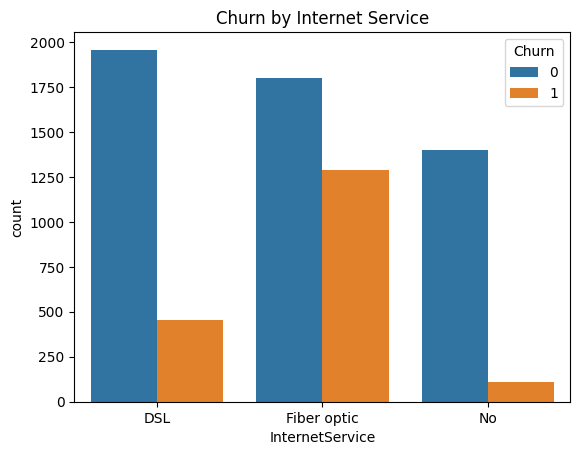

In [ ]:
# our dataset has many categorical variables, and we want to see correlation with them also!

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

print(df.groupby('InternetService')['Churn'].value_counts(normalize=True))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()


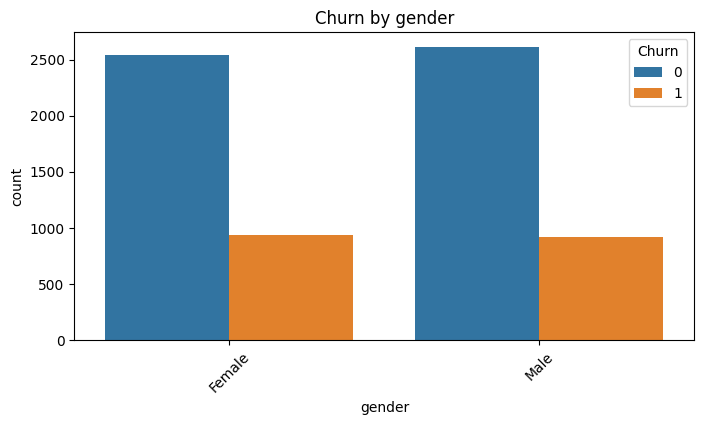

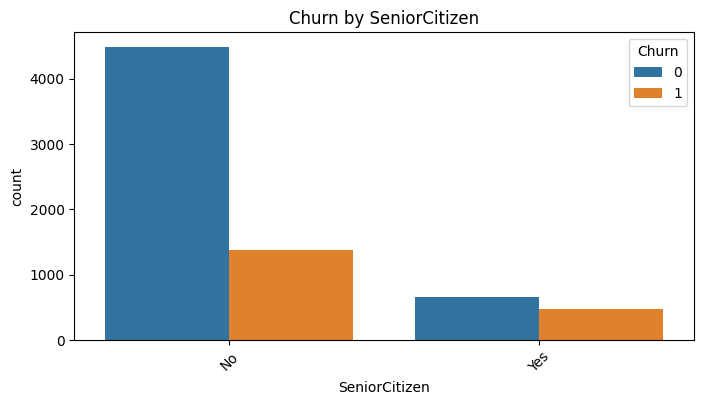

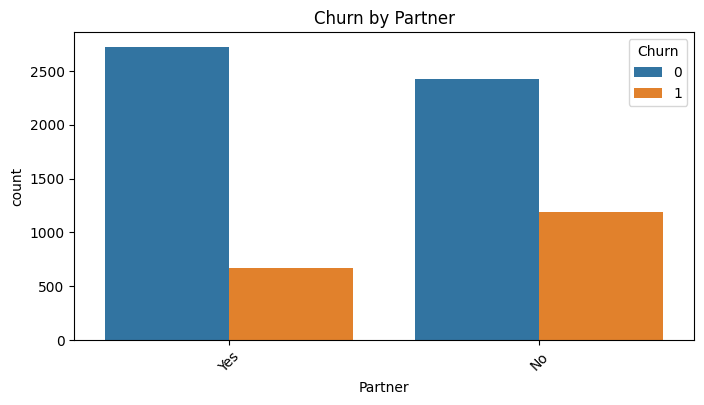

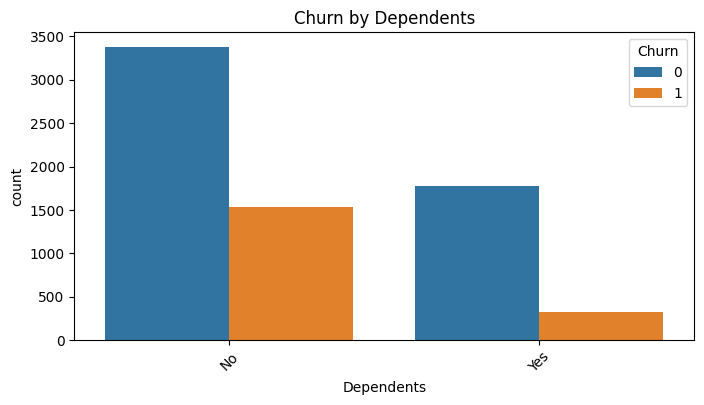

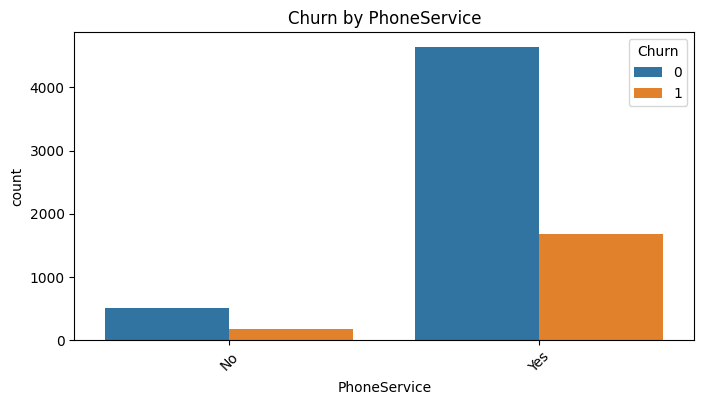

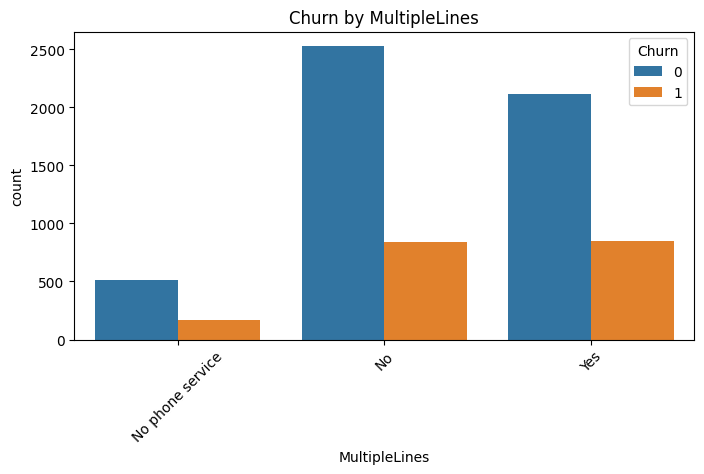

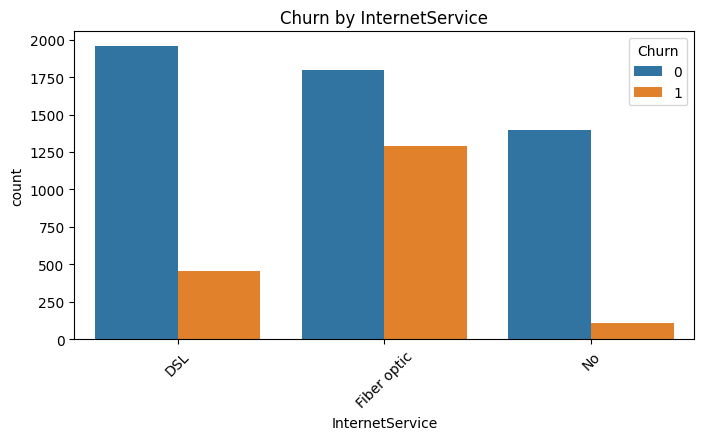

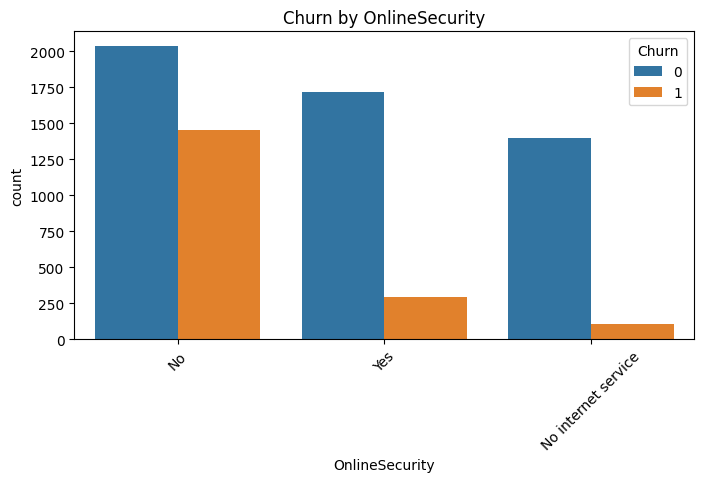

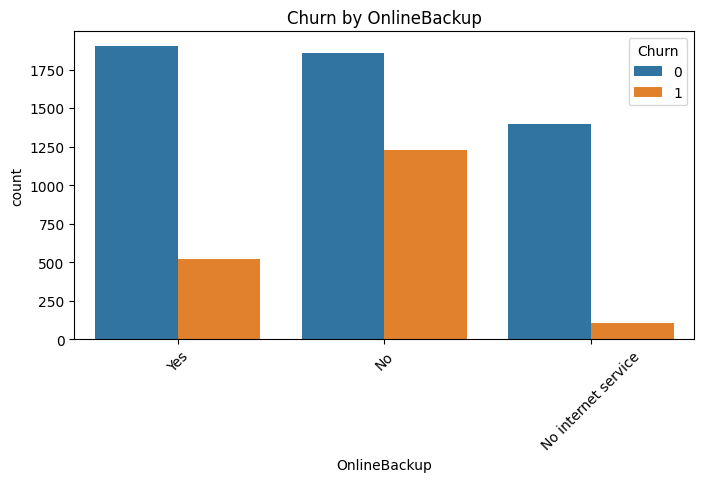

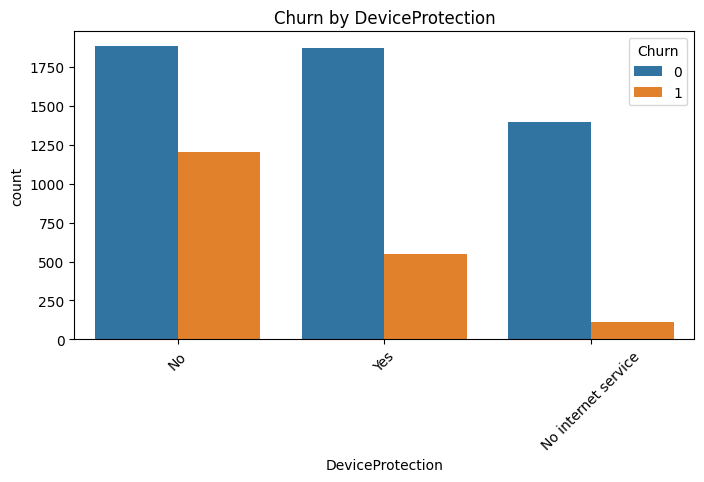

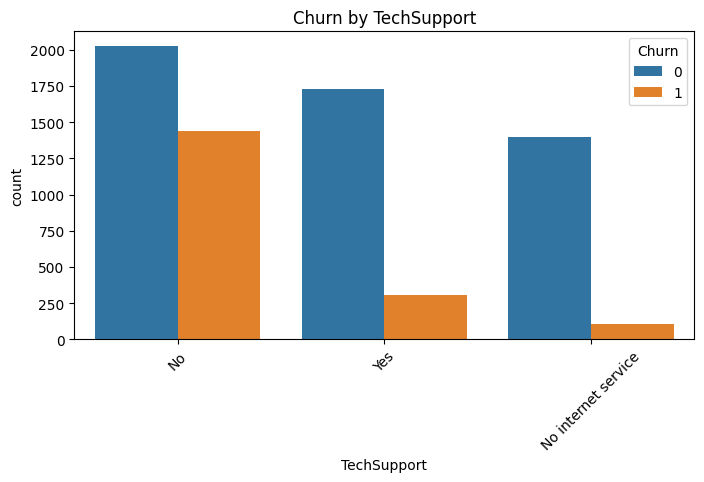

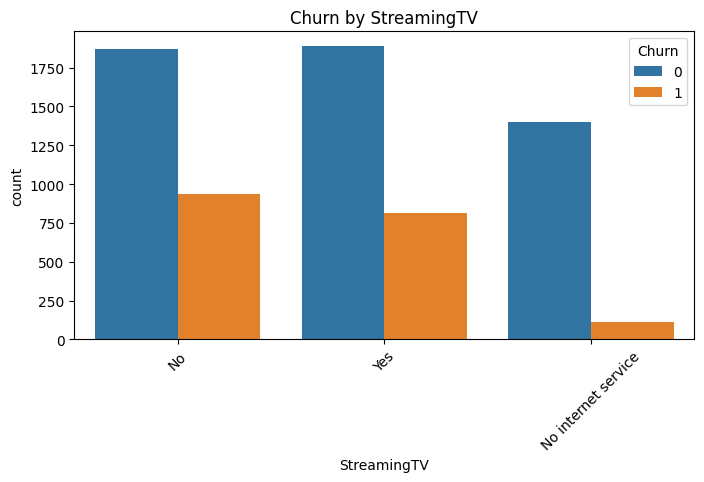

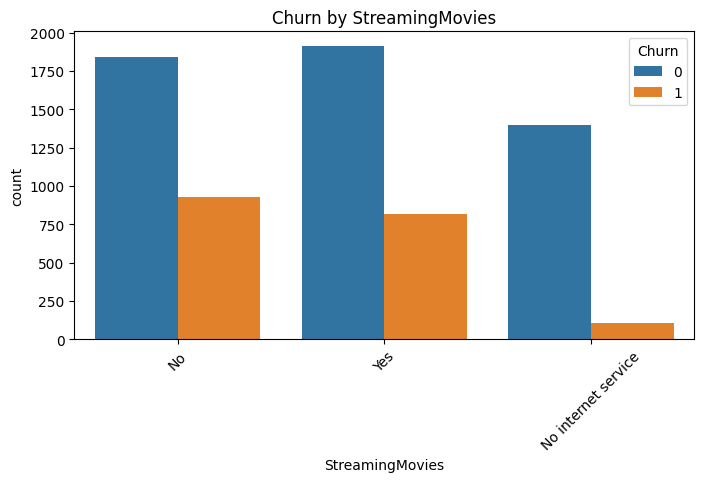

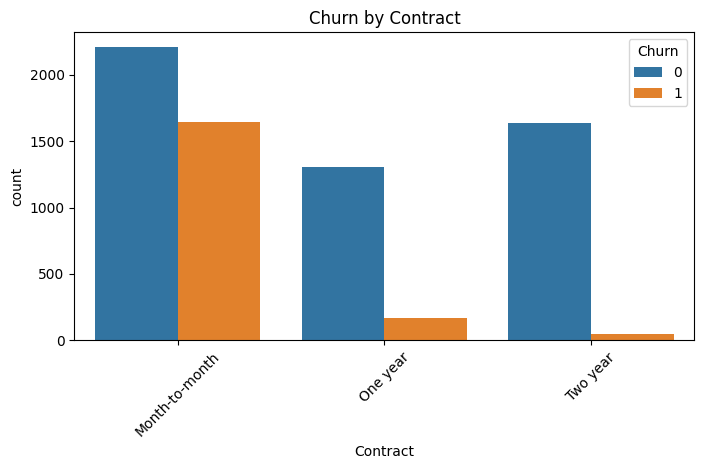

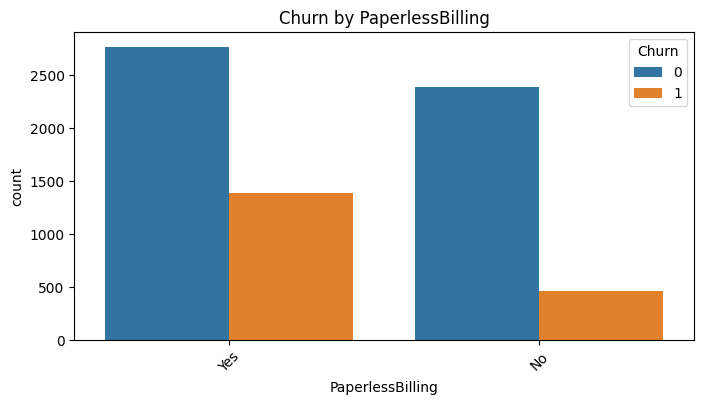

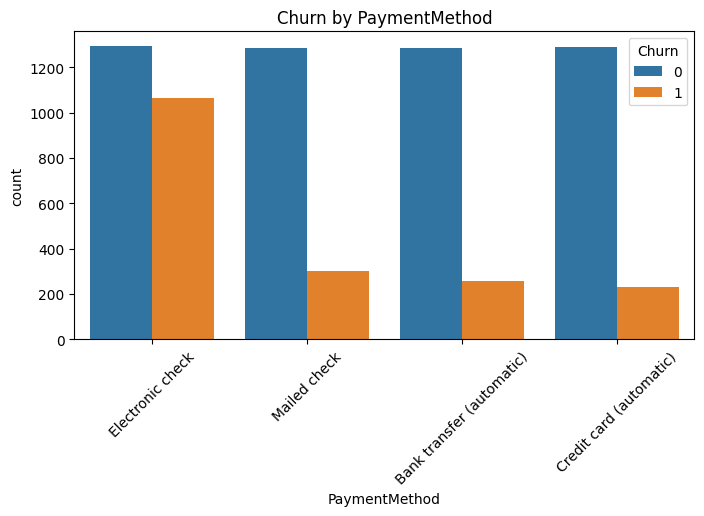

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through all categorical columns and visualize the relationship with Churn
for col in categorical_columns:
    if col != 'Churn':  # Skip the target column
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue='Churn', data=df)
        plt.title(f"Churn by {col}")
        plt.xticks(rotation=45)
        plt.show()


In [ ]:


# Preprocess data
preprocessor = DataPreprocessor(df)
df_internet, df_phone = preprocessor.split_by_service()

# Visualize splits
display(df_internet.head())
display(df_phone.head())

# Preprocess categorical columns
df_internet = preprocessor.preprocess_categorical(df_internet)
df_phone = preprocessor.preprocess_categorical(df_phone)

# Format column names
df_internet.columns = df_internet.columns.str.lower().str.replace(' ', '_')
df_phone.columns = df_phone.columns.str.lower().str.replace(' ', '_')

# Split and process data
splitter = DataSplitter(df_internet, df_phone, 0.2)
df_train_internet, df_test_internet, df_train_phone, df_test_phone = splitter.train_test_split()

# Impute missing values
df_train_internet, df_test_internet = splitter.impute_missing_values(df_train_internet, df_test_internet)
df_train_phone, df_test_phone = splitter.impute_missing_values(df_train_phone, df_test_phone)

# Revert to booleans
df_train_internet = splitter.revert_to_booleans(df_train_internet)
df_test_internet = splitter.revert_to_booleans(df_test_internet)

# Final check
display(df_train_internet.head())


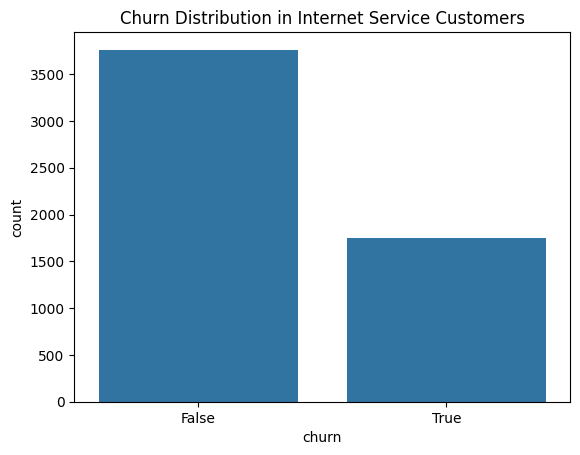

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize churn distribution
sns.countplot(data=df_internet, x='churn')
plt.title("Churn Distribution in Internet Service Customers")
plt.show()


In [ ]:
# Initialize preprocessor
preprocessor = DataPreprocessor(df)

# Split dataset into internet and phone services
df_internet, df_phone = preprocessor.split_by_service()

# Visualize splits
print("Internet Service Data")
display(df_internet.head())

print("Phone Service Data")
display(df_phone.head())

# Preprocess categorical columns
df_internet = preprocessor.preprocess_categorical(df_internet)
df_phone = preprocessor.preprocess_categorical(df_phone)

# Visualize after preprocessing
print("Internet Service Data (Preprocessed)")
display(df_internet.head())

print("Phone Service Data (Preprocessed)")
display(df_phone.head())


Internet Service Data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Phone Service Data


,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,No,No,No,34,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,No,No,No,2,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,No,No,No,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,No,No,Yes,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


Internet Service Data (Preprocessed)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Churn,is_male,InternetService_is_fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,True,False,1,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,34,True,True,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
2,False,False,False,2,True,True,True,False,False,False,...,True,True,False,True,False,False,False,False,False,True
3,False,False,False,45,False,True,False,True,True,False,...,False,True,False,False,True,False,True,False,False,False
4,False,False,False,2,True,False,False,False,False,False,...,True,False,True,True,False,False,False,False,True,False


Phone Service Data (Preprocessed)


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,is_male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,False,False,False,34,False,False,56.95,1889.50,False,True,False,True,False,False,False,False,True
2,False,False,False,2,False,True,53.85,108.15,True,True,True,False,False,False,False,False,True
4,False,False,False,2,False,True,70.70,151.65,True,False,True,False,False,False,False,True,False
5,False,False,False,8,True,True,99.65,820.50,True,False,True,False,False,False,False,True,False
6,False,False,True,22,True,True,89.10,1949.40,False,True,True,False,False,False,True,False,False


Outliers in 'SeniorCitizen': 1142
[1 1 1 ... 1 1 1]

Outliers in 'tenure': 0

Outliers in 'MonthlyCharges': 0

Outliers in 'TotalCharges': 0



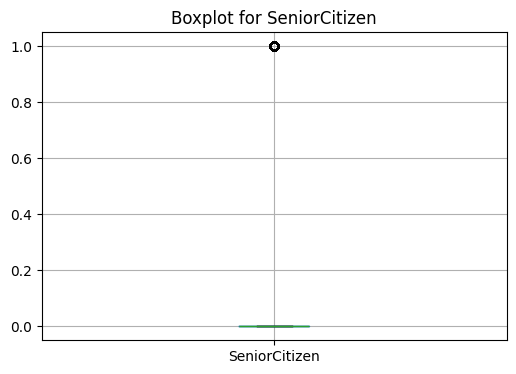

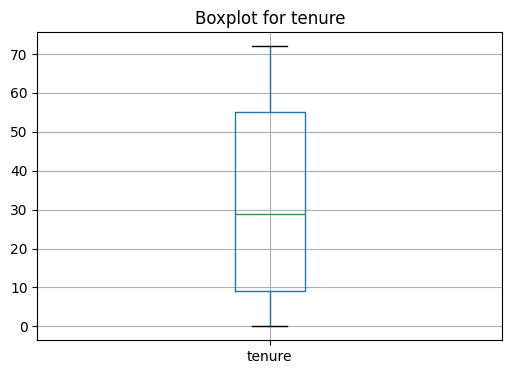

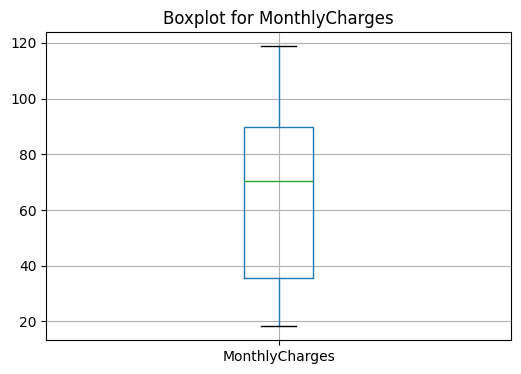

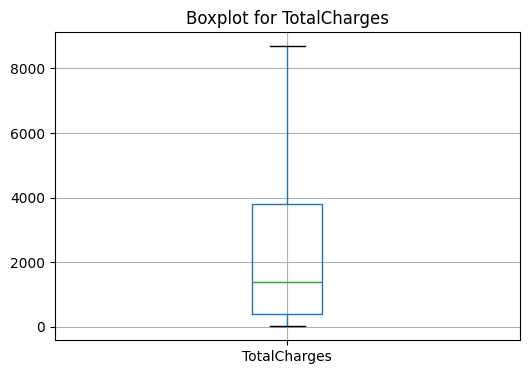

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'  # Replace with the correct file path
df = pd.read_csv(file_path)

# Convert 'TotalCharges' to numeric (if applicable)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check for outliers in each numerical column
for column in numerical_columns:
    outliers = detect_outliers_iqr(df, column)
    print(f"Outliers in '{column}': {len(outliers)}")
    if not outliers.empty:
        print(outliers[column].values)
    print()

# Optional: Visualize outliers using boxplots
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=column)
    plt.title(f"Boxplot for {column}")
    plt.show()


In [4]:
# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [10]:
print("Unique values per numeric column:")
for col in ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']:
    print(f"{col}: {df[col].nunique()}")

Unique values per numeric column:
SeniorCitizen: 2
tenure: 73
MonthlyCharges: 1585
TotalCharges: 6530
Churn: 0


In [ ]:
# Initialize splitter
splitter = DataSplitter(df_internet, df_phone, test_size=0.2)

# Split data
df_train_internet, df_test_internet, df_train_phone, df_test_phone = splitter.train_test_split()

# Visualize splits
print("Train - Internet Service")
display(df_train_internet.head())

print("Test - Internet Service")
display(df_test_internet.head())

print("Train - Phone Service")
display(df_train_phone.head())

print("Test - Phone Service")
display(df_test_phone.head())


KeyError: 'churn'

In [ ]:
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
# Confirm the churn column exists
print("Churn in df_internet:", 'churn' in df_internet.columns)
print("Churn in df_phone:", 'churn' in df_phone.columns)

# Check sample data
display(df_internet.head())
display(df_phone.head())


Churn in df_internet: False
Churn in df_phone: False


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Churn,is_male,InternetService_is_fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,True,False,1,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,34,True,True,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
2,False,False,False,2,True,True,True,False,False,False,...,True,True,False,True,False,False,False,False,False,True
3,False,False,False,45,False,True,False,True,True,False,...,False,True,False,False,True,False,True,False,False,False
4,False,False,False,2,True,False,False,False,False,False,...,True,False,True,True,False,False,False,False,True,False


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,is_male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,False,False,False,34,False,False,56.95,1889.50,False,True,False,True,False,False,False,False,True
2,False,False,False,2,False,True,53.85,108.15,True,True,True,False,False,False,False,False,True
4,False,False,False,2,False,True,70.70,151.65,True,False,True,False,False,False,False,True,False
5,False,False,False,8,True,True,99.65,820.50,True,False,True,False,False,False,False,True,False
6,False,False,True,22,True,True,89.10,1949.40,False,True,True,False,False,False,True,False,False
